<a href="https://colab.research.google.com/github/anamumaq/data_analytics_pucp/blob/main/C3_Clasificador_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://www.python.org/static/img/python-logo.png" width="300" alt="Python logo"  />
<font color='blue'>
$\Large\text{Pontificia Universidad Católica del Perú}$</font>

$$\Large \textit{Estadística Aplicada}$$

$$\large\textbf{Probabilidades - Aplicación Clasificador Naive Bayes}$$

_Autor:_

*   Gustavo Mallqui
___

#### **Lectura de una base de datos**

---



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving social_network_ads.csv to social_network_ads (1).csv


In [ ]:
import pandas as pd

dataset = pd.read_csv('/content/social_network_ads.csv',sep=';')
dataset.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


Importando librerias

In [ ]:
# Importacion de librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#visualizacion dataframe
pd.options.display.max_rows=500
pd.options.display.max_columns=500

In [ ]:
# separando
X = dataset.iloc[:, [2, 3]].values #variables dependientes
y = dataset.iloc[:, 4].values # variables a predecir (purchased)
dataset.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0


separando en train y test

In [ ]:
# Division de datos para entrenamientoy prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = 0)

estandarizando las escalas

In [ ]:
# Ajuste de escalas, estandarizando
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Creacion del modelo Naive Bayes
# y entrenamiento del mismo
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Prediccion del conjunto de prueba
y_pred = classifier.predict(X_test)

In [ ]:
# Matriz de confusion
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[65,  3],
       [ 7, 25]])

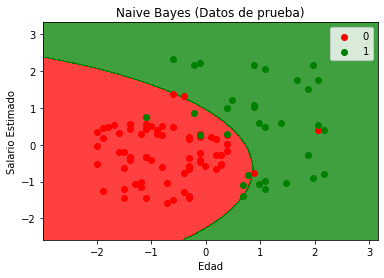

In [ ]:
# Visualizacion de los datos de prueba
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Datos de prueba)')
plt.xlabel('Edad')
plt.ylabel('Salario Estimado')
plt.legend()
plt.show()